In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, RFE, f_classif, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR

In [4]:
data_df = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'), header=None, index_col=False, 
names = ['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data_df.loc[:, ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
data.dtypes

age                int64
workclass         object
education         object
gender            object
hours-per-week     int64
occupation        object
income            object
dtype: object

In [8]:
for feature in data.select_dtypes('object').columns:
    print(data[feature].value_counts())

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
gender
 Male      21790
 Female    10771
Name: count, dtype: int64
occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1

In [9]:
data['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [21]:
data['workclass'] = (data['workclass']
 .str.strip()
 .replace({'Private':'No-answer', '?':'No-answer', 'Never-worked':'No-answer'})
)

In [22]:
data['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [23]:
ct = ColumnTransformer([('scaling', StandardScaler(), ['age', 'hours-per-week']),
                        ('onehot', OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [24]:
data_features = data.drop('income', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, np.where(data['income'] == ' >50K', 1, 0), random_state=0)

In [25]:
X_train_trans = ct.fit_transform(X_train)
X_train_trans.shape

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

(24420, 42)

In [27]:
ct.named_transformers_['onehot'], ct.named_transformers_['scaling']

(OneHotEncoder(sparse=False, sparse_output=False), StandardScaler())

In [28]:
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

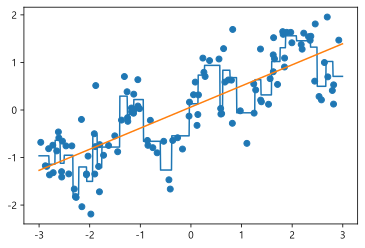

In [32]:
tree = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
lr = LinearRegression().fit(X, y)
plt.plot(line, tree.predict(line))
plt.plot(line, lr.predict(line))
plt.scatter(X[:, 0], y)

In [33]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform').fit(X)
kb.bin_edges_

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
              -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
               2.92132162])                                                   ],
      dtype=object)

In [35]:
X_binned = kb.transform(X)
X_binned.toarray()[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [36]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense').fit(X)
kb.bin_edges_

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
              -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
               2.92132162])                                                   ],
      dtype=object)

In [49]:
X_binned = kb.transform(X)
X_binned[:10], X_binned.shape

(array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]),
 (120, 10))

In [43]:
line_binned = kb.transform(line)
line_binned.shape

(1000, 10)

In [44]:
X_combined = np.hstack([X, X_binned])
line_combined = np.hstack([line, line_binned])
X_combined.shape, line_combined.shape

((120, 11), (1000, 11))

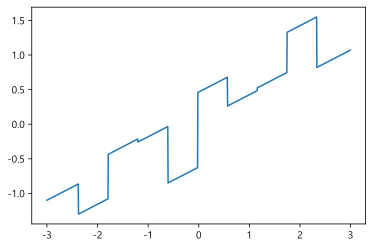

In [45]:
reg = LinearRegression().fit(X_combined, y)
plt.plot(line, reg.predict(line_combined))

In [50]:
X_product = np.hstack([X_binned, X*X_binned])
line_product = np.hstack([line_binned, line*line_binned])
X_product.shape

(120, 20)

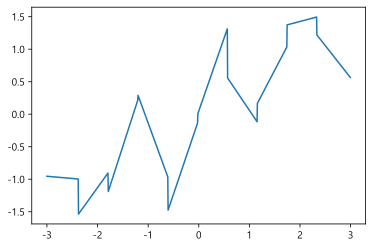

In [51]:
reg = LinearRegression().fit(X_product, y)
plt.plot(line, reg.predict(line_product))

In [55]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True).fit(X_combined)

In [56]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7',
       'x0 x8', 'x0 x9', 'x0 x10', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5',
       'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x2 x3', 'x2 x4',
       'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x3 x4',
       'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x4 x5',
       'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x5 x6', 'x5 x7',
       'x5 x8', 'x5 x9', 'x5 x10', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10',
       'x7 x8', 'x7 x9', 'x7 x10', 'x8 x9', 'x8 x10', 'x9 x10'],
      dtype=object)

In [71]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [72]:
np.bincount(X[:, 0])

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1], dtype=int64)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [74]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

In [81]:
ridge = Ridge(alpha=1).fit(X_train_log, y_train)
ridge.score(X_train_log, y_train), ridge.score(X_test_log, y_test)

(0.8627504186195984, 0.8749342372887816)

(array([ 13.,  53.,  90., 135., 173., 135.,  80.,  49.,  15.,   7.]),
 array([0.       , 0.5170484, 1.0340968, 1.5511452, 2.0681936, 2.585242 ,
        3.1022904, 3.6193388, 4.1363872, 4.6534356, 5.170484 ]),
 <BarContainer object of 10 artists>)

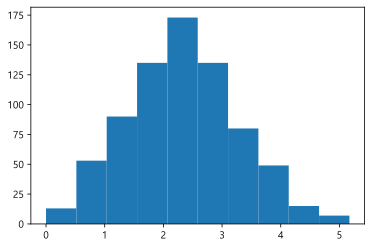

In [85]:
plt.hist(X_train_log[:, 1])

In [86]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=0)

In [87]:
select = RFE(RandomForestClassifier(n_estimators=30, random_state=42), n_features_to_select=20).fit(X_train, y_train)

In [88]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [96]:
select_feature = [int(feat[1:]) for feat in select.get_feature_names_out().tolist()]
select_feature

[0, 1, 2, 3, 5, 6, 7, 10, 12, 13, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [100]:
cancer['feature_names'][select_feature]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry',
       'worst fractal dimension'], dtype='<U23')

In [101]:
select.score(X_test, y_test)

0.9300699300699301

In [102]:
citibike = mglearn.datasets.load_citibike()
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

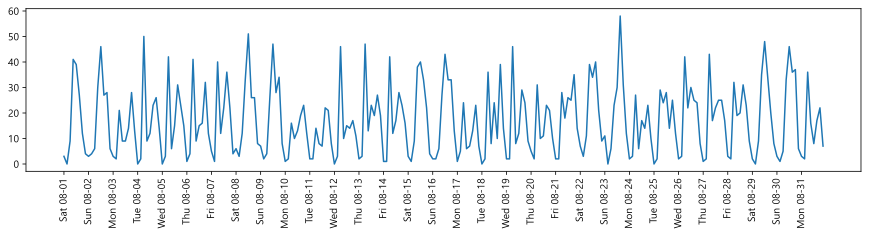

In [105]:
week = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
xticks_name = [week[int(w)]+d  for w, d in zip(xticks.strftime('%w'), xticks.strftime(' %m-%d'))]
plt.figure(figsize=(15, 3))
plt.xticks(xticks, xticks_name, rotation=90, ha='center')
plt.plot(citibike)
plt.show()

In [109]:
y = citibike.values
X = citibike.index.astype('int64').values.reshape(-1, 1) // 10**9

In [110]:
n_train = 184

In [111]:
def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]

    regressor.fit(X_train, y_train)
    print(f'테스트 세트 R^2: {regressor.score(X_test, y_test):.2f}')
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)

    plt.figure(figsize=(16, 3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha='left')

    plt.plot(range(n_train), y_train, label='훈련')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='테스트')
    plt.plot(range(n_train), y_pred_train, '--', label='훈련 예측')
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='테스트 예측')
    plt.legend(loc=(1.01, 0))

In [120]:
regressor = RandomForestClassifier(n_estimators=100, random_state=0)

테스트 세트 R^2: 0.16


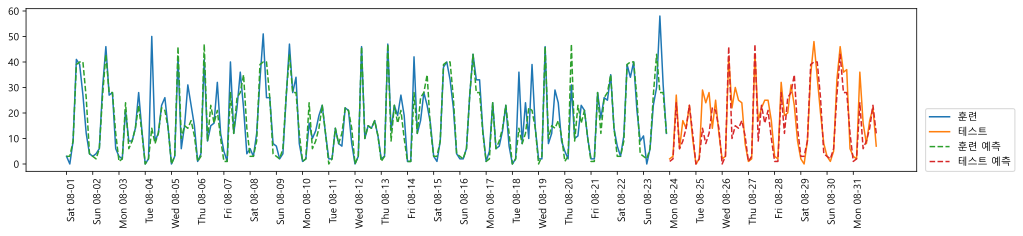

In [121]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)